In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import scale, normalize

In [285]:
def read_csv_to_data_frame(path):
    df= pd.read_csv(path)
    return df
    
data_path = "patient_metrics.csv"
profile_data_path = "patient_profiles1.csv"

# this is the complete df
metrics = read_csv_to_data_frame(data_path)
profiles = read_csv_to_data_frame(profile_data_path)

actual_groups = profiles["group"].to_numpy()
actual_groups = np.delete(actual_groups, 3)

# Replace NaN values with -1
actual_groups = np.nan_to_num(actual_groups, nan=-1)

# Convert the array to integers
actual_groups = actual_groups.astype(int)
print(actual_groups)
print(len(actual_groups))
metrics['actual_group'] = actual_groups

[1 0 0 1 1 0 3 2 2 0 0 1 1 1 0 3 2 2]
18


In [286]:

# drop patients column for use in kmeans 
metrics_wo_patients = metrics.copy()
metrics_wo_patients.drop(["patient_number"], axis=1)
metrics_wo_patients.drop(["actual_group"], axis=1)

#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(metrics_wo_patients)
#min_max_scaler = MinMaxScaler()
#scaled_features = min_max_scaler.fit_transform(metrics_wo_patients)

kmeans = KMeans(n_clusters=3, random_state=0, max_iter=300, n_init=10).fit(metrics_wo_patients)


metrics_with_group = metrics_wo_patients.copy()
metrics_with_group.insert(0, "Group", kmeans.labels_)
metrics = metrics.reset_index(drop=True)

#print(metrics.head(1), metrics_with_group.head(1))
# write the data with groups to csv

# re instert and groups
metrics.insert(0, "Group", kmeans.labels_)
#print(metrics.head(2))
#print(metrics["patient_number"])
print(kmeans.labels_)
print(actual_groups)

# write the metrics df with the clustered groups to a csv
p_df = pd.DataFrame(metrics)

# Specify the CSV file path
csv_file = "clustered_patient_metrics.csv"

# Write DataFrame to CSV
p_df.to_csv(csv_file, index=False)

# create a new df with patient_number, group and actual group
df_new = pd.concat([metrics[['patient_number', 'actual_group', 'Group']]], axis=1)
df_new = df_new.reset_index(drop=True)

[1 1 0 2 1 1 1 1 2 0 0 2 0 0 2 0 1 0]
[1 0 0 1 1 0 3 2 2 0 0 1 1 1 0 3 2 2]


In [278]:
# extract a variable
overall_load = metrics["overall_load"]
right_avg_load = metrics["right_avg_load"]
left_avg_load = metrics["left_avg_load"]
imbalance = metrics["imbalance"]

left_y_contribution = metrics["left_y_contribution"]
right_y_contribution = metrics["right_y_contribution"]

ml_imbalance = metrics["ml_imbalance"]

group = metrics_with_group["Group"]

C:\Users\mikec\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


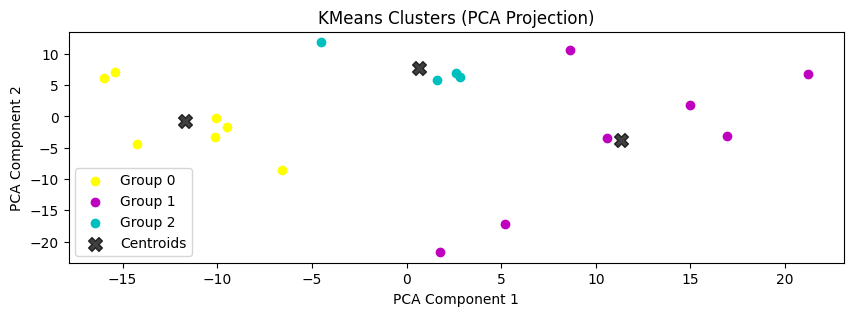

In [279]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(metrics_wo_patients)

# Create a scatter plot
plt.figure(figsize=(10, 3))

# Define colors for each group
colors = {0: 'yellow', 1: 'm', 2: 'c', 3:'b', 4:'r'}  # Add more colors if you have more groups

# Plot each group with its corresponding color
for group in np.unique(kmeans.labels_):
    plt.scatter(X_pca[kmeans.labels_ == group, 0], 
                X_pca[kmeans.labels_ == group, 1], 
                color=colors[group], 
                label=f'Group {group}')

# Plot cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', s=100, alpha=0.75, marker='X', label='Centroids')

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters (PCA Projection)')

# Add legend
plt.legend()
plt.show()

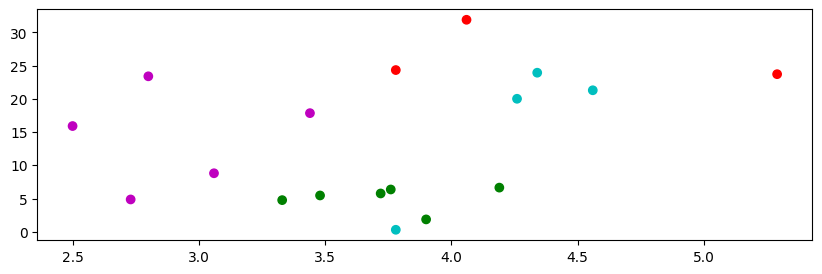

In [243]:

group = metrics_with_group["Group"]
fig, ax = plt.subplots(1,1, figsize=(10, 3))

colors = ['red', 'green', 'blue', 'c', 'm']
ax.scatter(overall_load, ml_imbalance, c=group, cmap=plt.matplotlib.colors.ListedColormap(colors))


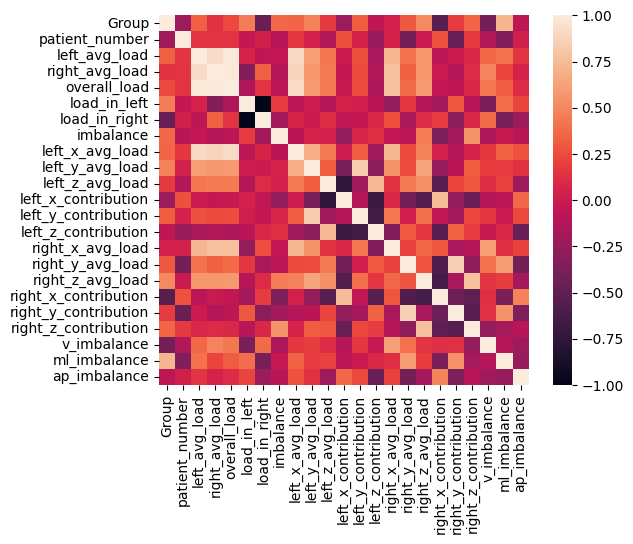

In [52]:
corr = metrics.corr(method='pearson', min_periods=1)
sns.heatmap(corr, square=True)
plt.show()

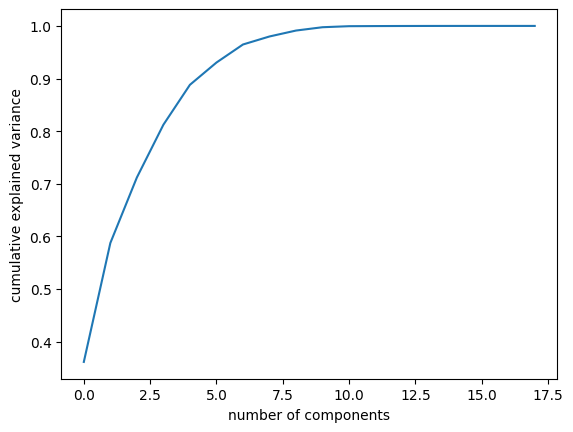

In [53]:
pca = PCA().fit(metrics)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()